Generating SHAP summary plot (beeswarm)...


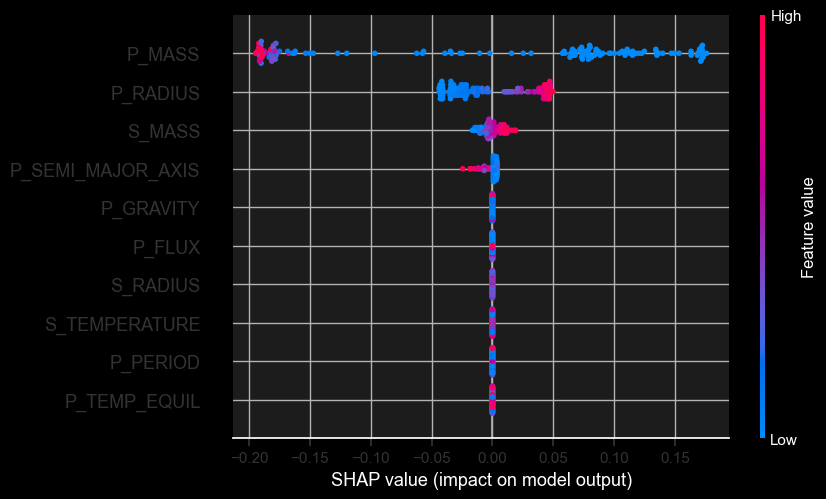

Generating SHAP force plot for top prediction...


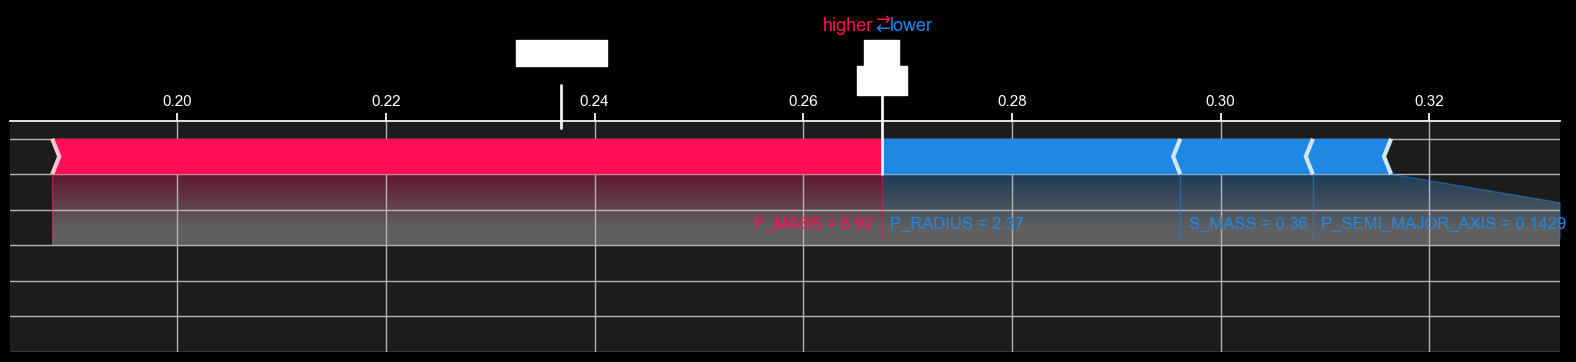

Generating radar chart for top 5 predictions...


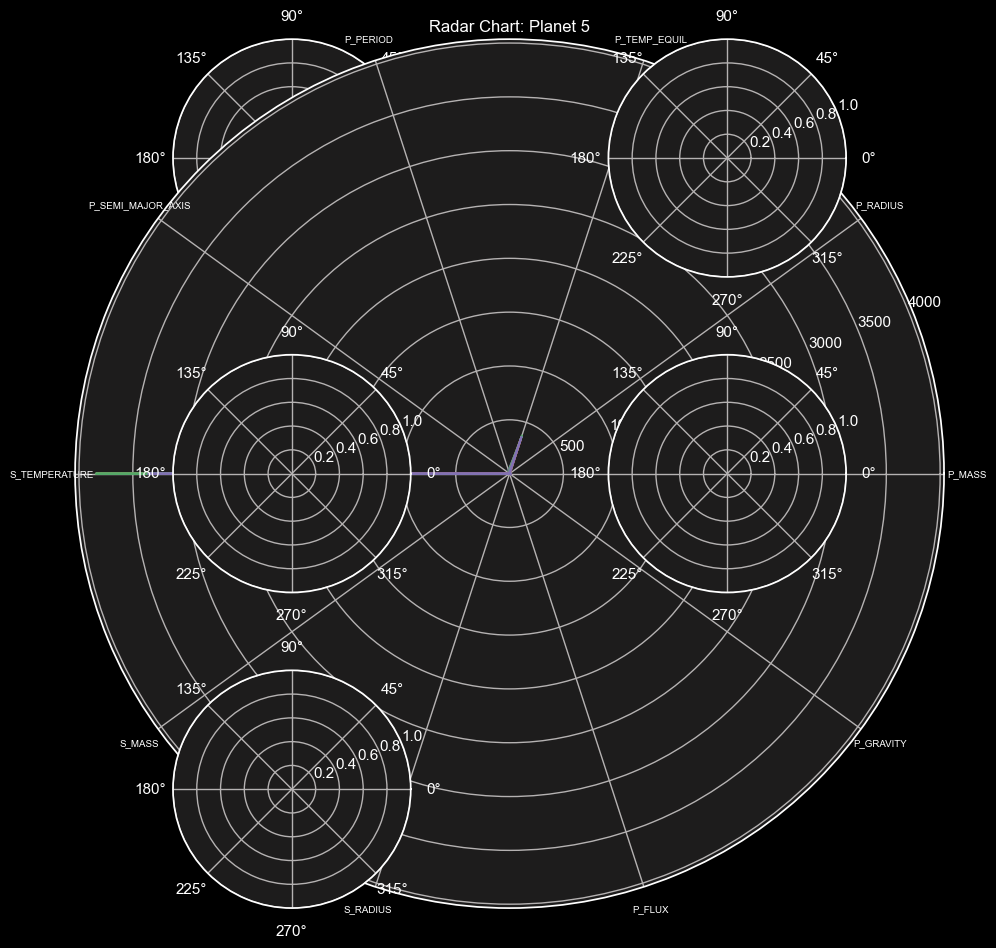

Generating t-SNE plot...


Generating PCA scatter plot...


Advanced visualizations complete.


In [40]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import plotly.express as px

plt.style.use('seaborn-v0_8-deep')
sns.set_theme(style="darkgrid", palette="deep")
plt.rcParams.update({
    'axes.facecolor': "#1D1C1C",
    'figure.facecolor': "#000000",
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': "#B5B2B2",
    'savefig.facecolor': "#484848",
    'savefig.edgecolor': "#F5F3F3"
})

# Load model and predictions
model = joblib.load("rf_model.joblib")
df = pd.read_csv("STEMx-2025-AI-Astro-Material/predictions.csv")

# Separate features and predictions
X = df.drop(columns=['Predictions'])
y_pred = df['Predictions']

# 1. SHAP Summary Plot (Beeswarm)
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
print("Generating SHAP summary plot (beeswarm)...")
shap.plots.beeswarm(shap_values, max_display=12, show=True)

# 2. SHAP Force Plot for top prediction
print("Generating SHAP force plot for top prediction...")
top_idx = np.argmax(y_pred)
shap.plots.force(shap_values[top_idx], matplotlib=True, show=True)

# 3. Radar Chart for Top 5 Predictions
print("Generating radar chart for top 5 predictions...")
top5 = df.sort_values(by='Predictions', ascending=False).head(5)
features = X.columns.tolist()

def plot_radar(df_row, label):
    values = df_row[features].values.flatten().tolist()
    values += values[:1]  # close the loop
    angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(features, fontsize=7)
    ax.set_title("Radar Chart: " + label)
    ax.grid(True)

plt.figure(figsize=(10, 10))
for i, (_, row) in enumerate(top5.iterrows()):
    plt.subplot(3, 2, i + 1, polar=True)
    plot_radar(row, f"Planet {i+1}")
plt.tight_layout()
plt.show()

# 4. t-SNE Projection
print("Generating t-SNE plot...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(X_embedded, columns=['TSNE-1', 'TSNE-2'])
tsne_df['Predictions'] = y_pred

fig = px.scatter(tsne_df, x='TSNE-1', y='TSNE-2', color='Predictions',
                 title="t-SNE Projection Colored by Predicted ESI",
                 color_continuous_scale='viridis')
fig.show()

# 5. PCA Plot
print("Generating PCA scatter plot...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Predictions'] = y_pred

fig = px.scatter(pca_df, x='PCA1', y='PCA2', color='Predictions',
                 title="PCA Projection Colored by Predicted ESI",
                 color_continuous_scale='plasma')
fig.show()

print("Advanced visualizations complete.")


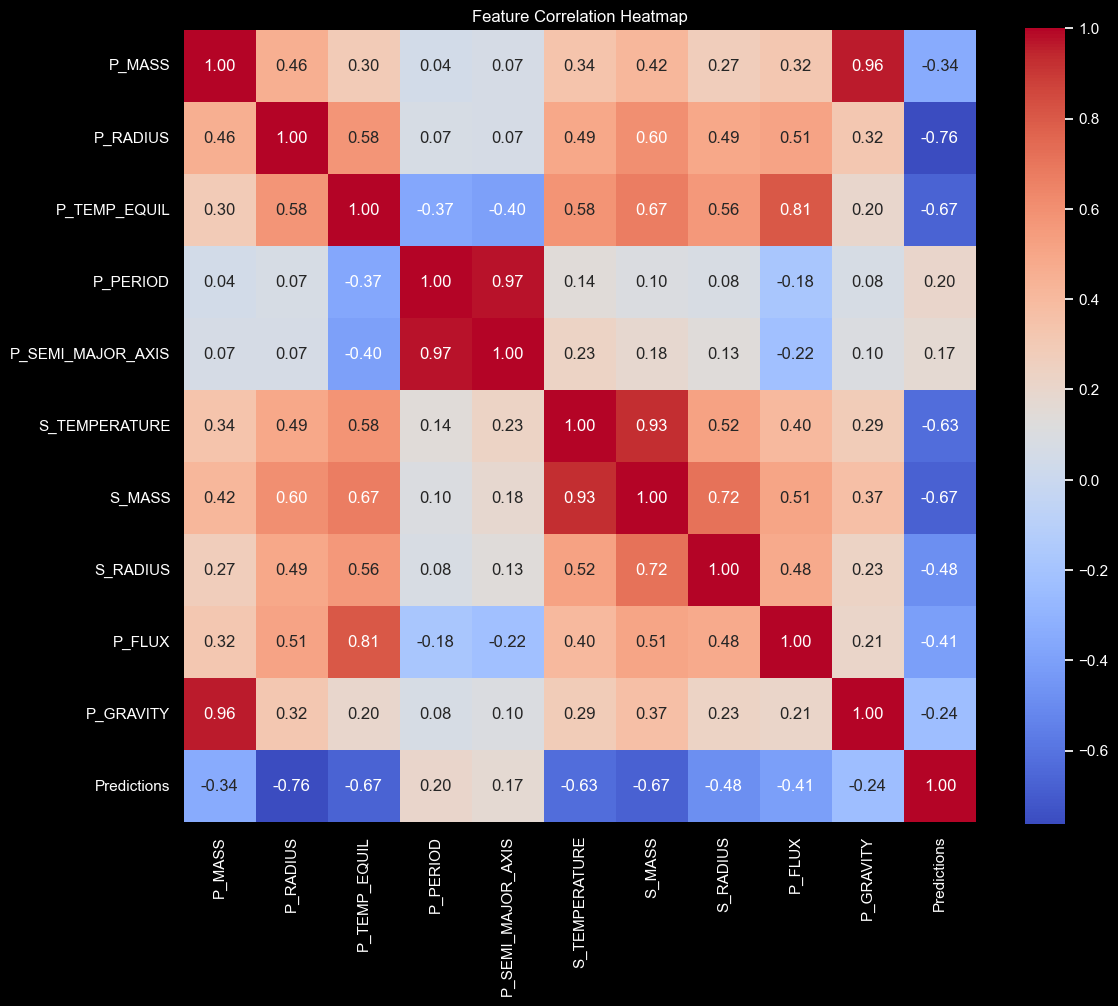

Visual summaries complete.


In [41]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_dark"

# Load model and data
model = joblib.load("rf_model.joblib")
df = pd.read_csv("STEMx-2025-AI-Astro-Material/predictions.csv")

# Separate features and prediction
y_pred = df['Predictions']
X = df.drop(columns=['Predictions'])

# 1. 3D Scatter Plot (Radius vs Temp vs Flux)
fig1 = px.scatter_3d(df, x='P_RADIUS', y='P_TEMP_EQUIL', z='P_FLUX',
                    color='Predictions', size='P_MASS',
                    title='3D Scatter: Radius vs Temperature vs Flux',
                    color_continuous_scale='viridis')
fig1.show()

# 2. Bubble Chart (Period vs Semi-major Axis, size by Radius)
fig2 = px.scatter(df, x='P_PERIOD', y='P_SEMI_MAJOR_AXIS',
                  size='P_RADIUS', color='Predictions',
                  title='Bubble Chart: Period vs Semi-major Axis',
                  color_continuous_scale='plasma', size_max=40)
fig2.show()

# 3. Parallel Coordinates Plot
df_parallel = df.copy()
df_parallel = df_parallel.sort_values(by='Predictions', ascending=False).head(100)  # top 100 for clarity
fig3 = px.parallel_coordinates(df_parallel, color='Predictions',
                               title='Parallel Coordinates (Top 100)',
                               color_continuous_scale='Tealrose')
fig3.show()

# 4. Heatmap of Feature Correlation
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

print("Visual summaries complete.")

In [42]:
print(list(pio.templates))

['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark', 'presentation', 'xgridoff', 'ygridoff', 'gridon', 'none']
